## Perform a exploratory data analysis on the given datasets (electric_motor.csv).                Find and plot all the time series, histograms, violin plot, see distribution of data sets, cross-correlation of the data. Also, analyze other plots taught in EDA lecture

In [1]:
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn

In [2]:
df1=pd.read_csv('electric_motor.csv')
df1

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


In [3]:
df1.isnull().sum()

ambient           0
coolant           0
u_d               0
u_q               0
motor_speed       0
torque            0
i_d               0
i_q               0
pm                0
stator_yoke       0
stator_tooth      0
stator_winding    0
profile_id        0
dtype: int64

In [4]:
## checking for duplicates

df1.duplicated().sum()

0

In [5]:
## checking for outliers.

Q1 = df1.quantile(0.25)
Q3 = df1.quantile(0.75)
IQR = Q3 - Q1

outliers=df1[(df1 < (Q1 - 1.5 *IQR)) | (df1 > (Q3 + 1.5 *IQR)) ]
outliers.isnull().sum()

ambient           959578
coolant           998070
u_d               980020
u_q               998070
motor_speed       998070
torque            870767
i_d               998070
i_q               849535
pm                996569
stator_yoke       998070
stator_tooth      998070
stator_winding    998070
profile_id        998070
dtype: int64

In [6]:
## before removing the outliers the shape of df
df1.shape

(998070, 13)

In [7]:
## after removing outliers the shape of df

df2=df1[~((df1 < (Q1 - 1.5 *IQR)) | (df1 > (Q3 + 1.5 *IQR))).any(axis=1)]
df2.shape

(814996, 13)

In [8]:
df2

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
0,-0.752143,-1.118446,0.327935,-1.297858,-1.222428,-0.250182,1.029572,-0.245860,-2.522071,-1.831422,-2.066143,-2.018033,4
1,-0.771263,-1.117021,0.329665,-1.297686,-1.222429,-0.249133,1.029509,-0.245832,-2.522418,-1.830969,-2.064859,-2.017631,4
2,-0.782892,-1.116681,0.332771,-1.301822,-1.222428,-0.249431,1.029448,-0.245818,-2.522673,-1.830400,-2.064073,-2.017343,4
3,-0.780935,-1.116764,0.333700,-1.301852,-1.222430,-0.248636,1.032845,-0.246955,-2.521639,-1.830333,-2.063137,-2.017632,4
4,-0.774043,-1.116775,0.335206,-1.303118,-1.222429,-0.248701,1.031807,-0.246610,-2.521900,-1.830498,-2.062795,-2.018145,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...
998065,-0.047497,0.341638,0.331475,-1.246114,-1.222428,-0.255640,1.029142,-0.245723,0.429853,1.018568,0.836084,0.494725,72
998066,-0.048839,0.320022,0.331701,-1.250655,-1.222437,-0.255640,1.029148,-0.245736,0.429751,1.013416,0.834438,0.494279,72
998067,-0.042350,0.307415,0.330946,-1.246852,-1.222430,-0.255640,1.029191,-0.245701,0.429439,1.002906,0.833936,0.492666,72
998068,-0.039433,0.302082,0.330987,-1.249505,-1.222432,-0.255640,1.029147,-0.245727,0.429558,0.999157,0.830504,0.490581,72


In [23]:
df2.describe()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
count,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000,814996.000000
mean,0.074327,0.043378,-0.108752,0.073228,0.057953,0.055707,0.112811,0.057467,0.045887,-0.005105,-0.038661,-0.082340,50.858718
std,0.842397,1.020929,0.880459,1.062721,1.056624,0.637751,0.994801,0.635833,0.956329,1.004616,0.990678,0.967570,22.774148
min,-2.528432,-1.326642,-1.654878,-1.692953,-1.371529,-1.488004,-3.109984,-1.392057,-2.628648,-1.834688,-2.066143,-2.019973,4.000000
25%,-0.549461,-1.034215,-0.872168,-1.167716,-1.141301,-0.255640,-0.643348,-0.245732,-0.602911,-0.770572,-0.778084,-0.791304,31.000000
50%,0.269779,-0.131247,0.240986,0.082905,-0.004975,-0.185800,0.453488,-0.176573,0.111043,-0.057719,-0.033528,-0.078244,57.000000
75%,0.686956,0.838960,0.342796,0.960540,0.997569,0.464114,1.029133,0.481189,0.701153,0.674934,0.769904,0.626848,69.000000
max,2.615644,2.297432,2.135743,1.793498,2.024164,1.768235,1.060255,1.633992,2.710098,2.449158,2.326668,2.573466,81.000000


## Histogram

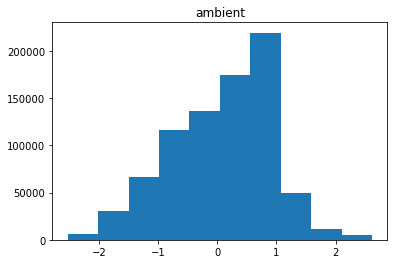

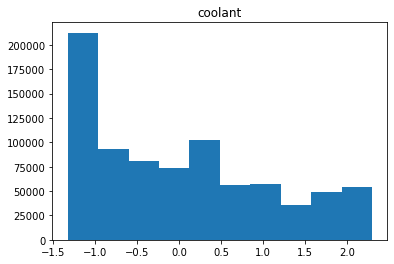

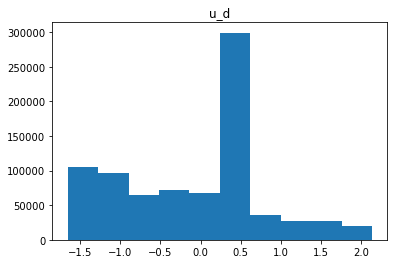

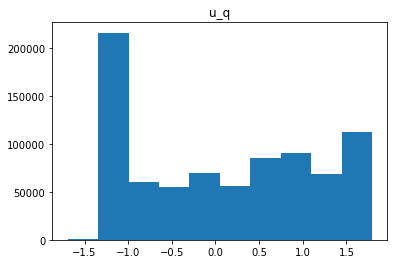

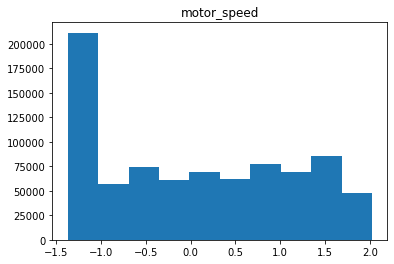

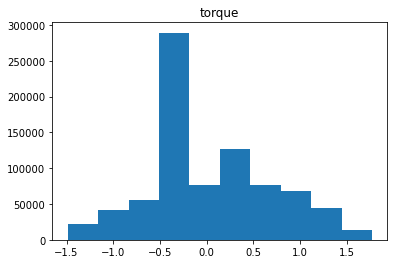

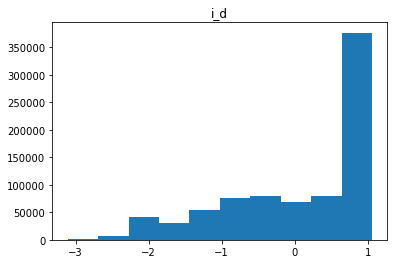

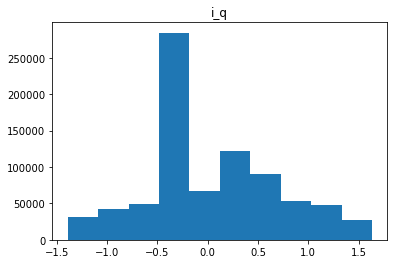

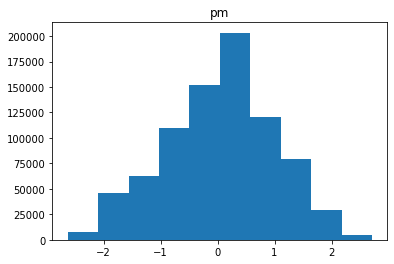

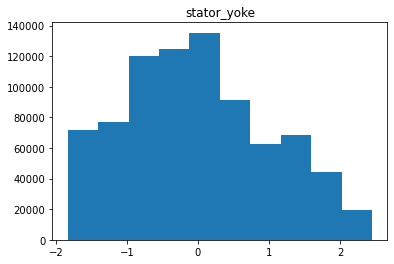

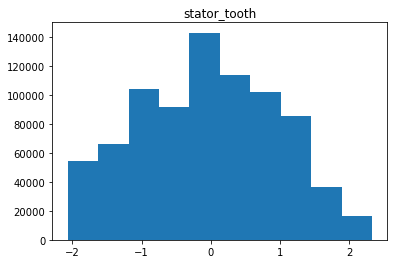

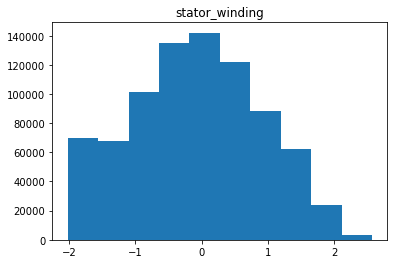

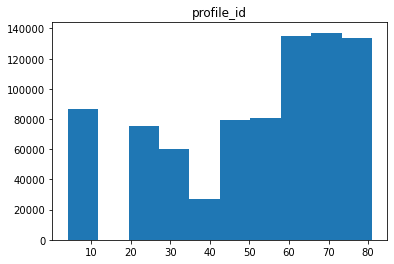

In [9]:
for feature in df2.columns:
    plt.title(feature)
    plt.hist(df2[feature])
    plt.show()

## Voilin Plot

<AxesSubplot:xlabel='profile_id', ylabel='motor_speed'>

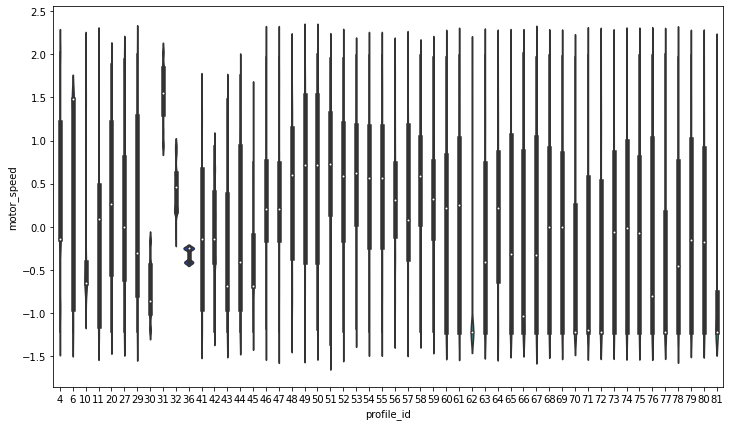

In [10]:
plt.figure(figsize=(12,7))
sbn.violinplot(x='profile_id',y='motor_speed',data=df2,palette='winter')

## Cross-correlation

In [11]:
df2.corr()

,ambient,coolant,u_d,u_q,motor_speed,torque,i_d,i_q,pm,stator_yoke,stator_tooth,stator_winding,profile_id
ambient,1.000000,0.399480,0.147875,0.070383,0.034122,-0.161160,0.016085,-0.162920,0.394973,0.415292,0.363603,0.290629,0.370495
coolant,0.399480,1.000000,0.178951,0.013726,-0.056116,-0.179571,0.111160,-0.174933,0.388552,0.882587,0.702237,0.537764,0.487998
u_d,0.147875,0.178951,1.000000,-0.012887,-0.309555,-0.886515,0.538459,-0.845703,-0.173839,-0.009800,-0.153375,-0.263108,0.314603
u_q,0.070383,0.013726,-0.012887,1.000000,0.725273,-0.055580,-0.282381,-0.038319,0.091586,0.128812,0.198203,0.203841,-0.137591
motor_speed,0.034122,-0.056116,-0.309555,0.725273,1.000000,0.107290,-0.821602,0.070620,0.328285,0.196167,0.378149,0.475515,-0.189148
torque,-0.161160,-0.179571,-0.886515,-0.055580,0.107290,1.000000,-0.392887,0.992615,0.066255,-0.033613,0.075373,0.173067,-0.276421
i_d,0.016085,0.111160,0.538459,-0.282381,-0.821602,-0.392887,1.000000,-0.327846,-0.353362,-0.175287,-0.387453,-0.534230,0.167090
i_q,-0.162920,-0.174933,-0.845703,-0.038319,0.070620,0.992615,-0.327846,1.000000,0.038836,-0.045427,0.050860,0.138921,-0.274789
pm,0.394973,0.388552,-0.173839,0.091586,0.328285,0.066255,-0.353362,0.038836,1.000000,0.680281,0.781660,0.783877,0.113198
stator_yoke,0.415292,0.882587,-0.009800,0.128812,0.196167,-0.033613,-0.175287,-0.045427,0.680281,1.000000,0.950128,0.855460,0.390430


<AxesSubplot:>

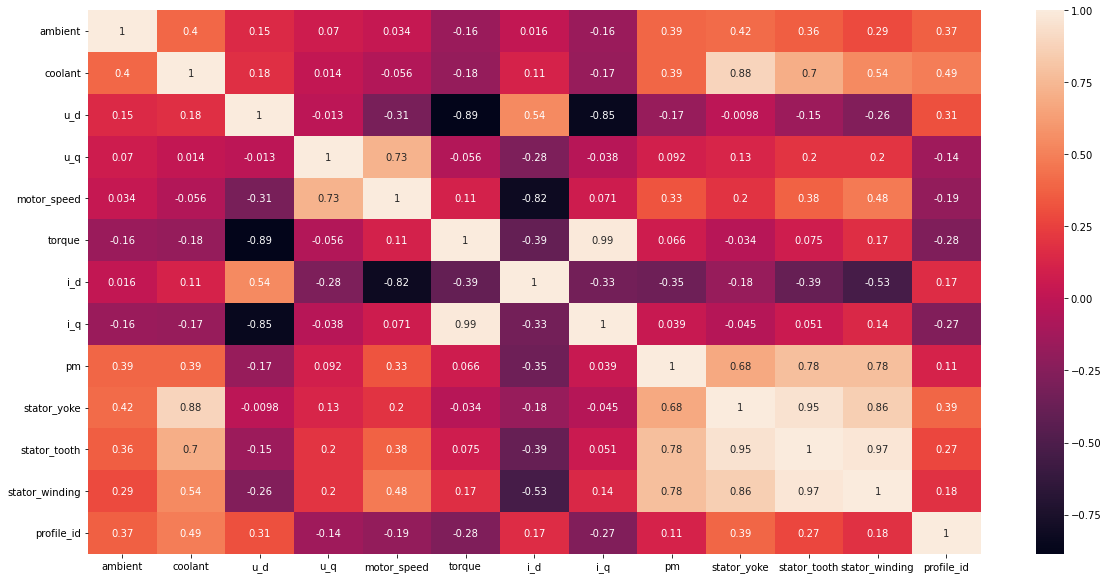

In [12]:
plt.figure(figsize=(20,10))
sbn.heatmap(df2.corr(),annot=True)

## box plot

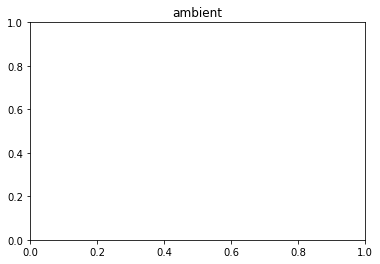

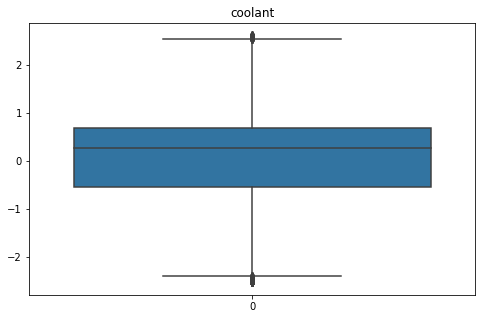

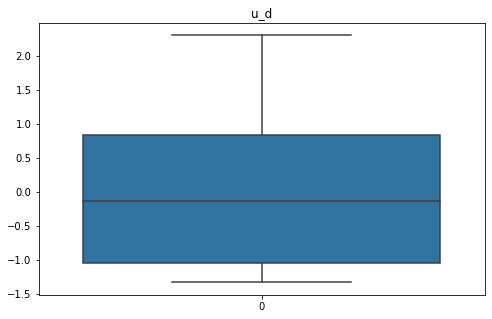

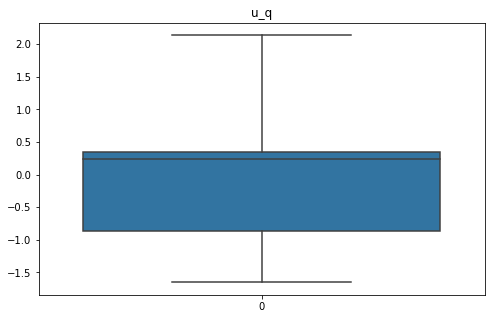

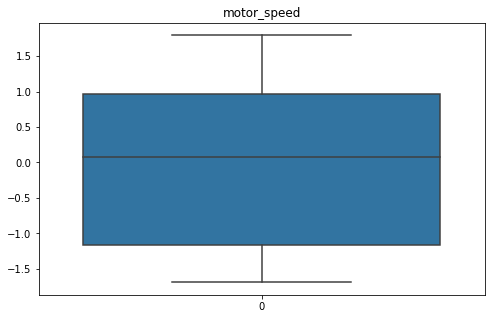

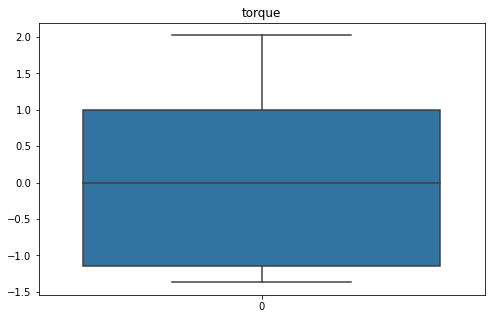

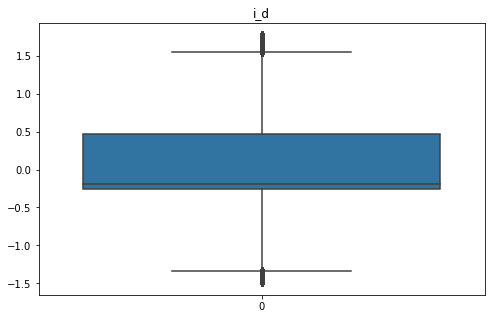

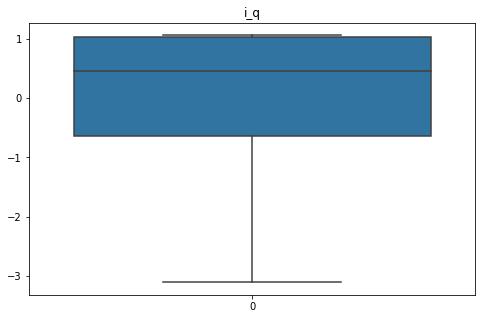

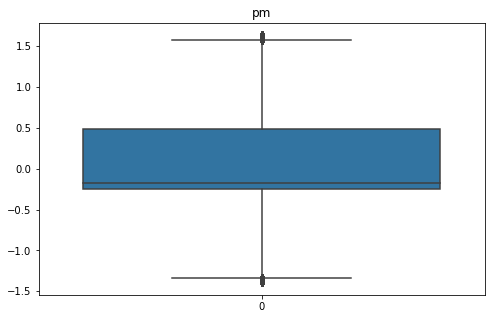

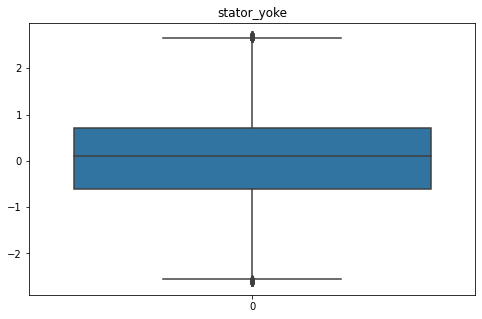

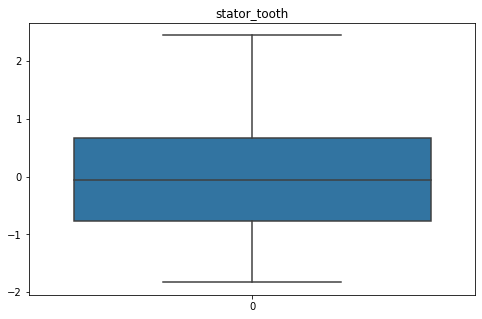

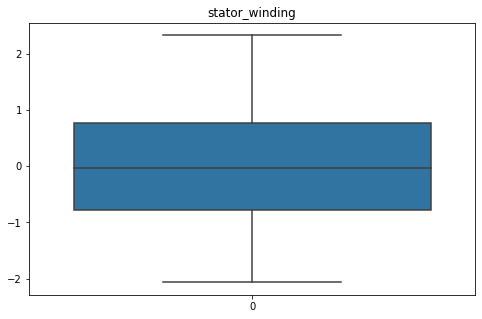

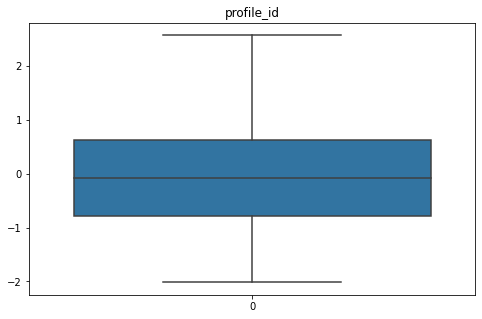

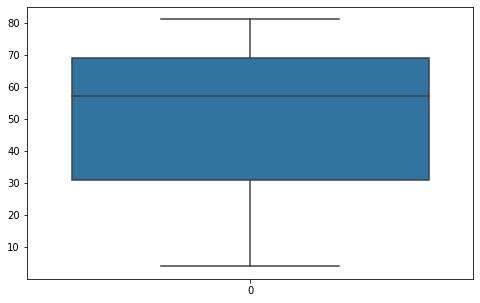

In [13]:
for feature in df2.columns:
    plt.title(feature)
    plt.figure(figsize=(8,5))
    sbn.boxplot(data=df2[feature])

## Scatter plot

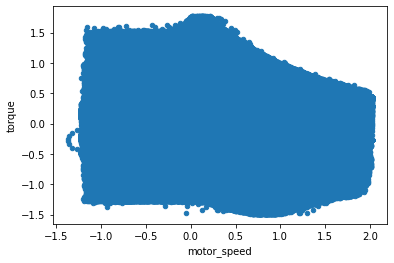

<Figure size 1080x864 with 0 Axes>

In [14]:
df2.plot(kind='scatter',x='motor_speed',y='torque')
plt.figure(figsize=(15,12))
plt.show()

## Line plot

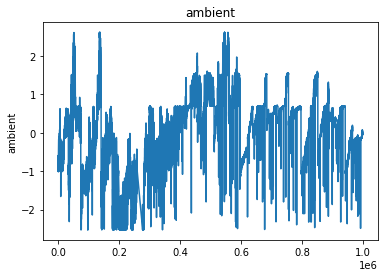

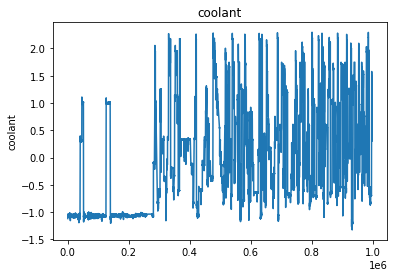

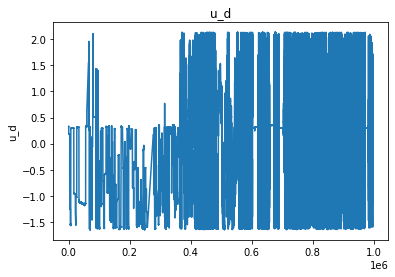

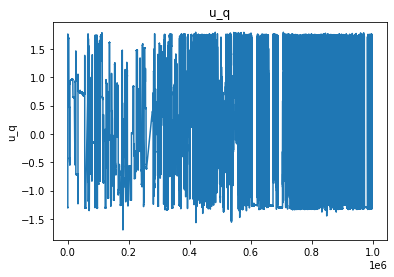

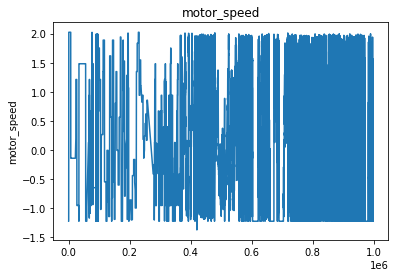

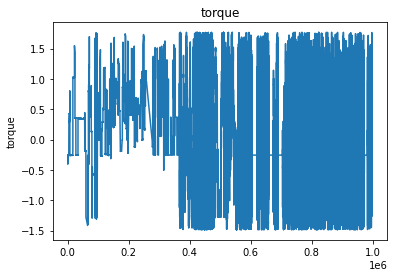

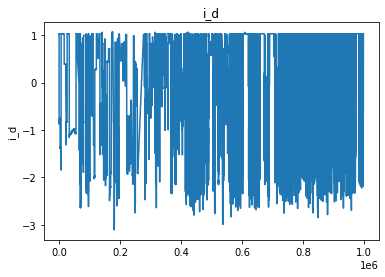

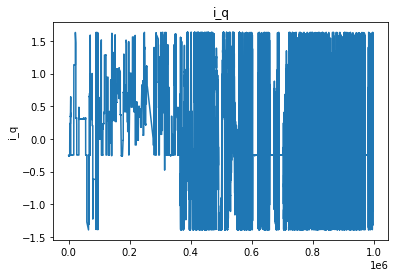

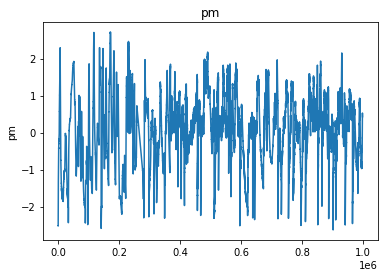

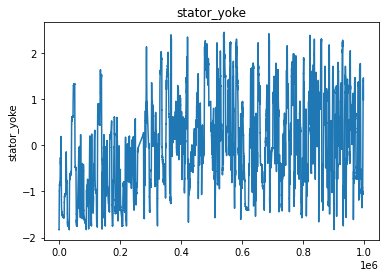

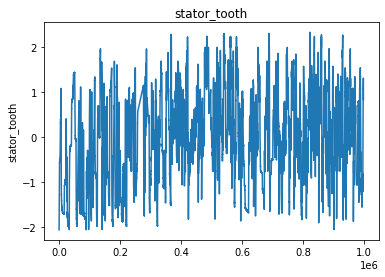

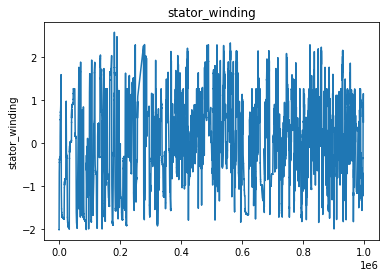

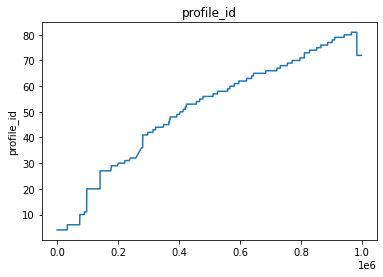

In [22]:
for feature in df2.columns:
    plt.title(feature)
    sbn.lineplot(data=df2[feature])
    plt.show()